## Description in main function: removeIslands

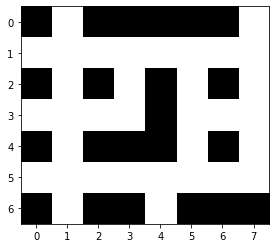

In [41]:
import random
import numpy as np
import matplotlib.pyplot as plt

matrix = [[0, 1, 0, 0, 0, 0, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1], [0, 1, 0, 1, 0, 1, 0, 1],
          [1, 1, 1, 1, 0, 1, 1, 1], [0, 1, 0, 0, 0, 1, 0, 1], [1, 1, 1, 1, 1, 1, 1, 1],
          [0, 1, 0, 0, 1, 0, 0, 0]]
n = len(matrix)
m = len(matrix[0])
max_point = n*m -1
min_point = 0
# print(matrix)

nparr = np.array(matrix)  # Pretty little islands

plt.imshow(nparr, cmap="gray") 

In [42]:
def index_to_row_col(point):
    row = point//m
    col = point%m
    return row, col

def inGrid(starting_point):
    if starting_point>max_point:
        return False
    if starting_point < min_point:
        return False
    return True

In [43]:
def largest_connected_segment(starting_point, boundary_pixels, visited_so_far):
    
    if starting_point in boundary_pixels:
        boundary_pixels.remove(starting_point)
        visited_so_far.add(starting_point)
        print("visited so far: ", visited_so_far)

    if inGrid(starting_point+1) and starting_point+1 not in visited_so_far:
        i,j = index_to_row_col(starting_point+1)
        if matrix[i][j] ==0: # right
            visited_so_far.add(starting_point+1)
            print("visited so far: ", visited_so_far)
            visited_so_far = largest_connected_segment(starting_point+1, boundary_pixels, visited_so_far)
            print("added from right", visited_so_far)
      
    if inGrid(starting_point-1) and starting_point-1 not in visited_so_far: # left
        i,j = index_to_row_col(starting_point-1)
        if matrix[i][j] ==0:
            visited_so_far.add(starting_point-1)
            print("visited so far: ", visited_so_far)
            visited_so_far = largest_connected_segment(starting_point-1, boundary_pixels, visited_so_far)
            print("added from left", visited_so_far)

    if inGrid(starting_point+m) and starting_point+m not in visited_so_far: # bottom
        i,j = index_to_row_col(starting_point+m)
        if matrix[i][j] ==0:
            visited_so_far.add(starting_point+m)
            print("visited so far: ", visited_so_far)
            visited_so_far = largest_connected_segment(starting_point+m, boundary_pixels, visited_so_far)
            print("added from below", visited_so_far)
            
    if inGrid(starting_point-m) and starting_point-m not in visited_so_far: # top
        i,j = index_to_row_col(starting_point-m)
        if matrix[i][j] ==0:
            visited_so_far.add(starting_point-m)
            print("visited so far: ", visited_so_far)
            visited_so_far = largest_connected_segment(starting_point-m, boundary_pixels, visited_so_far)
            print("added from above", visited_so_far)
    return visited_so_far



In [44]:
'''
Input: A 2D matrix of 0's and 1's
 - 1 represents a black pixel
 - 0 represents a white  pixel
Goal: remove all black pixels that are 'islands' - 
i.e. black pixels that are not connected to the boundary of the matrix
Output: modified picture - all black pixels are now white!
'''
def removeIslands(matrix):
# Plan: Number each pixel: 0, 1, 2, ... n*m-1
# Keep track of pixels visited so that we don't infinitely loop 
# Count all pixels which are reachable from boundary pixels as those that we want to keep
# For any remaining pixels (they are visited in the order 0,1,..n*m-1) in matrix which are both: not in 'visited set' and are black, turn them white - aka remove island black pixels

## Main idea: just choose a starting point from the set of boundary pixels and do a bfs (dfs would work just as well), and mark all pixels that that starting point can COVER including boundary pixels, which we will remove from current boundary pixel set (so that we don't choose those pixels as starting points again - it would be useless to start from them again as it would give the same connected segment as the bfs that had first found it). 
# Next, randomly choose another boundary pixel out of those remaining (that have not already been covered in previous bfs s)
# In this way, we get the maximum non island chunk from every boundary pixel (may be 1 pixel big) so we can just loop until the set of boundary pixels is 
    
    top = [i for i in range(m) if matrix[0][i] ==0]
    left = [j*m for j in range(n) if matrix[j][0] == 0]
    right = [(k+1)*m-1 for k in range(n) if matrix[k][-1] == 0]
    bottom = [i+((n-1)*m) for i in range(m) if matrix[-1][i] ==0]
    # all possible starting points
    boundary_pixels = set(top + left + bottom+ right)
  
    print("boundary pixels: " , boundary_pixels)

    visited_so_far= set([])

    while len(boundary_pixels) != 0:
        starting_point = random.choice(list(boundary_pixels))
        #print(starting_point)
        visited_so_far = largest_connected_segment(starting_point, boundary_pixels, visited_so_far)

    print(visited_so_far)
    #print("boundary pixels:", boundary_pixels)  
  
  # Now get rid of all black pixels that are not in 'visited_so_far' - they are island black pixels
    count = 0
    islands_removed = matrix.copy()
     # Pretty little islands again - reminder of how it looks against the island removed version
    oldimg = np.array(matrix)   
    plt.imshow(oldimg, cmap="gray")

    while (count<=max_point):
        p, q = index_to_row_col(count)
        #print(p,q)
        if count not in visited_so_far and matrix[p][q] ==0:
            #print("found  black island with indices!", count, (p,q))
            islands_removed[p][q] = 1  # turn black pixel not part of boundary to white!
        count +=1
    return oldimg, islands_removed, visited_so_far

boundary pixels:  {0, 32, 2, 3, 4, 5, 6, 16, 48, 50, 51, 53, 54, 55}
visited so far:  {48}
visited so far:  {48, 6}
visited so far:  {48, 5, 6}
visited so far:  {48, 5, 6}
visited so far:  {48, 4, 5, 6}
visited so far:  {48, 4, 5, 6}
visited so far:  {3, 4, 5, 6, 48}
visited so far:  {3, 4, 5, 6, 48}
visited so far:  {2, 3, 4, 5, 6, 48}
visited so far:  {2, 3, 4, 5, 6, 48}
added from left {2, 3, 4, 5, 6, 48}
added from left {2, 3, 4, 5, 6, 48}
added from left {2, 3, 4, 5, 6, 48}
added from left {2, 3, 4, 5, 6, 48}
visited so far:  {2, 3, 4, 5, 6, 48, 55}
visited so far:  {2, 3, 4, 5, 6, 48, 54, 55}
visited so far:  {2, 3, 4, 5, 6, 48, 54, 55}
visited so far:  {2, 3, 4, 5, 6, 48, 53, 54, 55}
visited so far:  {2, 3, 4, 5, 6, 48, 53, 54, 55}
added from left {2, 3, 4, 5, 6, 48, 53, 54, 55}
added from left {2, 3, 4, 5, 6, 48, 53, 54, 55}
visited so far:  {2, 3, 4, 5, 6, 48, 50, 53, 54, 55}
visited so far:  {2, 3, 4, 5, 6, 48, 50, 51, 53, 54, 55}
visited so far:  {2, 3, 4, 5, 6, 48, 50, 51, 

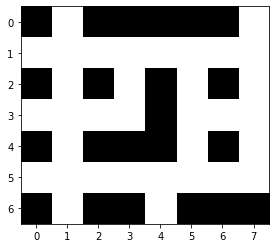

In [45]:
oldimg, islands_removed, visited_so_far = removeIslands(matrix)
print(islands_removed)

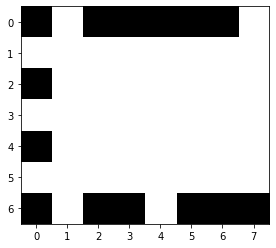

In [46]:
# picture with 'islands' removed
newimg = np.array(islands_removed) 
plt.imshow(newimg, cmap="gray") 

#### Thanks ! (this was part of a challenge in a Google interview)